<a href="https://colab.research.google.com/github/colliercoder/Twitter/blob/main/TelsaEarnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TWITTER_KEYS.csv to TWITTER_KEYS.csv


In [ ]:
#Get the data
keys = pd.read_csv('TWITTER_KEYS.csv',sep = ',')

In [ ]:
consumer_key = keys['CONSUMERKEY'][0]
consumer_secret = keys['CONSUMERSECRET'][0]
access_token = keys['ACCESSTOKEN'][0]
access_token_secret = keys['ACCESSTOKENSECRET'][0]

In [ ]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

In [ ]:
#Set the access toekn and access token secret
authenticate.set_access_token(access_token,access_token_secret)

In [ ]:
#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#Gather 1500 tweets about tesla earnings
#Create a search term
search_term = 'Tesla earnings'
#Create the cursor object
tweets = tweepy.Cursor(api.search,
                       q = search_term,
                       lang = 'en',
                       since = '2022-03-27',
                       tweet_mode = 'extended'
                       ).items(1500)
#Store tweets
all_tweets = [tweet.full_text for tweet in tweets]
#Show all the tweets
all_tweets

['Zillow, Redfin, and Opendoor Earnings Are Coming. 3 Things to Watch.-\n\nhttps://t.co/coBiE03Kqb',
 '@EvasTeslaSPlaid @elonmusk 😲 Tesla is still trading at a price-to-earnings ratio of 90. Toyota is at 10 in comparison, so there is not much to complain about. 🤷\u200d♂️',
 'RT @BrendanFaganFx: Nasdaq 100 Remains Under Pressure as Netflix Craters; Tesla Earnings Eyed\n\n$QQQ $NQ $NFLX $TSLA $TWTR\n\nLink:\nhttps://t.…',
 'RT @BrendanFaganFx: Nasdaq 100 Pares Gains During Volatile Fed Day, Tesla Falls on Earnings\n\n$NQ $QQQ $TSLA $NQ_F\n\nLink:\nhttps://t.co/QOvOs…',
 "RT @squawksquare: If $NVDA is up in AH's tonight after earnings, so will $TSLA. If $NVDA dips in AH's on earnings, so will Tesla. Just keep…",
 'RT @EvasTeslaSPlaid: Will NVDA beets earnings today? If so Tesla &amp; the whole market will be up after hours. Let’s go NVDA. https://t.co/Y4s…',
 'Zillow, Redfin, and Opendoor Earnings Are Coming. 3 Things to Watch.-\n\nhttps://t.co/coBiE0llhJ',
 '@JPATrades Even if they make 

In [ ]:
#Create a dataframe to store the tweets
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
#Show the first 6 rows of data
df.head(6)

,Tweets
0,"Zillow, Redfin, and Opendoor Earnings Are Comi..."
1,@EvasTeslaSPlaid @elonmusk 😲 Tesla is still tr...
2,RT @BrendanFaganFx: Nasdaq 100 Remains Under P...
3,RT @BrendanFaganFx: Nasdaq 100 Pares Gains Dur...
4,RT @squawksquare: If $NVDA is up in AH's tonig...
5,RT @EvasTeslaSPlaid: Will NVDA beets earnings ...


In [ ]:
#Data cleaning
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('RT','',twt) #remove 'RT' from the tweets
  twt = re.sub('#[A-Za-z0-9]+','',twt) #remove '#' from the tweets
  twt = re.sub('\\n','',twt) #Remove the '\n' character
  twt = re.sub('http?:\/\/\S+','',twt) #remove hyperlink
  twt = re.sub('@[\S*]','',twt) #Remove @mentions
  twt = re.sub('^[\s]+|[\s]+$','',twt) #remove leading and trailing whitespaces
  return twt


In [ ]:
#Create a new column called 'Cleaned_Tweets'
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
df

,Tweets,Cleaned_Tweets
0,"Zillow, Redfin, and Opendoor Earnings Are Comi...","Zillow, Redfin, and Opendoor Earnings Are Comi..."
1,@EvasTeslaSPlaid @elonmusk 😲 Tesla is still tr...,vasTeslaSPlaid lonmusk 😲 Tesla is still tradin...
2,RT @BrendanFaganFx: Nasdaq 100 Remains Under P...,rendanFaganFx: Nasdaq 100 Remains Under Pressu...
3,RT @BrendanFaganFx: Nasdaq 100 Pares Gains Dur...,rendanFaganFx: Nasdaq 100 Pares Gains During V...
4,RT @squawksquare: If $NVDA is up in AH's tonig...,quawksquare: If $NVDA is up in AH's tonight af...
...,...,...
784,f) Tesla's $TSLA Q4 and FY2021 earnings:\n\nht...,f) Tesla's $TSLA Q4 and FY2021 earnings:https:...
785,RT @Tesla: Tesla Q1 Earnings Call and Q&amp;A ...,esla: Tesla Q1 Earnings Call and Q&amp;A → htt...
786,RT @donniccolo: https://t.co/YSDQfb3fBk\n\nGre...,onniccolo: https://t.co/YSDQfb3fBkGreat esla e...
787,RT @ElectrekCo: Podcast: Ford F-150 Lightning ...,lectrekCo: Podcast: Ford F-150 Lightning first...


In [ ]:
#Remove duplicate values
#Create a new dataframe
df = pd.DataFrame(df['Cleaned_Tweets'], columns = ['Cleaned_Tweets'])
df.drop_duplicates(inplace = True)
idx = list(range(0,len(df)))
df = df.set_index(pd.Index(idx))
#Show the data
df

,Cleaned_Tweets
0,"Zillow, Redfin, and Opendoor Earnings Are Comi..."
1,vasTeslaSPlaid lonmusk 😲 Tesla is still tradin...
2,rendanFaganFx: Nasdaq 100 Remains Under Pressu...
3,rendanFaganFx: Nasdaq 100 Pares Gains During V...
4,quawksquare: If $NVDA is up in AH's tonight af...
...,...
544,LIVE BLOG: Tesla (TSLA) Q1 2021 earnings call ...
545,f) Tesla's $TSLA Q4 and FY2021 earnings:https:...
546,onniccolo: https://t.co/YSDQfb3fBkGreat esla e...
547,lectrekCo: Podcast: Ford F-150 Lightning first...


In [ ]:
#Create a function to get the subjectivity 
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [ ]:
#Create two new columns for our data set and it will hold the subjectivity and polarity
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [ ]:
#Create a function to classify or label the sentiments as negative (Polarity<0), positive (Polarity>0), neutral (Polarity = 0)
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'


In [ ]:
#Create another column 'Sentiment'
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.head()

,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,"Zillow, Redfin, and Opendoor Earnings Are Comi...",0.0,0.0,Neutral
1,vasTeslaSPlaid lonmusk 😲 Tesla is still tradin...,0.2,-0.1,Negative
2,rendanFaganFx: Nasdaq 100 Remains Under Pressu...,0.0,0.0,Neutral
3,rendanFaganFx: Nasdaq 100 Pares Gains During V...,0.0,0.0,Neutral
4,quawksquare: If $NVDA is up in AH's tonight af...,0.0,0.0,Neutral


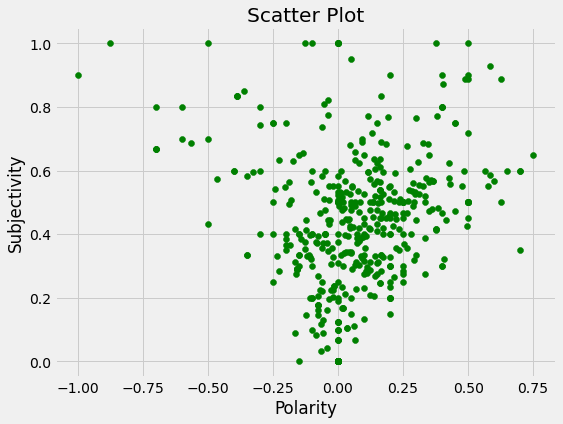

In [ ]:
#Create a scatter plot of the subjectivity and polarity
plt.figure(figsize = (8,6))
for i in range(0,len(df)):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'green')
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

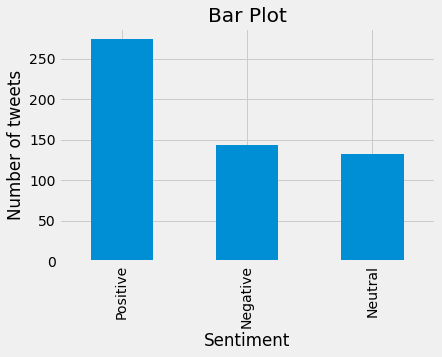

In [ ]:
#Create a barchart
df['Sentiment'].value_counts().plot(kind='bar');
plt.title('Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

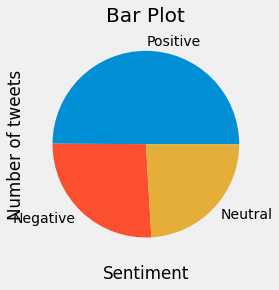

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie');
plt.title('Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()